## This notebook shows how to open HDF5 data files (produced in DD4Hep), and plot hit distributions. Includes a map of the index within the  file to the variables of interest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

from sklearn.preprocessing import StandardScaler

import h5py as h5

from IPython.display import display_html 

In [2]:
#Prints Map of Index to Variable in the H5 File
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("color", 'black')])]    # the color value can not be None

df1 = pd.DataFrame({'Hit E':[0],'Hit X':[1],'Hit Y':[2],'Hit Z':[3]},index=['Index'])
df2 = pd.DataFrame({'mcPDG':[0], 'mcSimulatorStatus':[1], 'mcGeneratorStatus':[2],'mcPX':[3],
                    'mcPY':[4],'mcPZ':[5],'mcMass':[6],'mcPT':[7],'mcP':[8],'mcTheta':[9]},index=['Index'])
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('[Calorimeter Hit]')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('[Truth Particle]')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

[Calorimeter Hit] 
 
 
   
 Hit E 
 Hit X 
 Hit Y 
 Hit Z 
 
 
 
 
 Index 
 0 
 1 
 2 
 3 
 
 
 

 
 [Truth Particle] 
 
 
   
 mcPDG 
 mcSimulatorStatus 
 mcGeneratorStatus 
 mcPX 
 mcPY 
 mcPZ 
 mcMass 
 mcPT 
 mcP 
 mcTheta 
 
 
 
 
 Index 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9

## Get data

In [3]:
filename = 'rec_pionplus_300k.hdf5'
#filename = 'rec_pionplus_vartheta.hdf5'
h5_file = h5.File(filename,'r')
print(list(h5_file.keys()))

ecal = h5_file['ecal']
hcal = h5_file['hcal']
mc = h5_file['mc']

print(hcal.shape)
print(hcal.chunks) #important for TF batch_size

['ecal', 'hcal', 'mc']
(290500, 4, 1736)
(100, 4, 1736)


In [4]:
N_Events = 10_000

hcal_E = hcal[:N_Events,0]
hcal_X = hcal[:N_Events,1]
hcal_Y = hcal[:N_Events,2]
hcal_Z = hcal[:N_Events,3]

ecal_E = ecal[:N_Events,0]
ecal_X = ecal[:N_Events,1]
ecal_Y = ecal[:N_Events,2]
ecal_Z = ecal[:N_Events,3]
#NOTE: This pulls everything into memory.
#This is OK for small files, but the benefit
#Of hdf5 is the ability to slice the file,
#just as you would a numpy array.

In [5]:
print("HCal E",np.nanmean(hcal_E.flatten().reshape(-1, 1)), "+/-", np.nanstd(hcal_E.flatten().reshape(-1, 1)))
print("HCal X",np.nanmean(hcal_X.flatten().reshape(-1, 1)), "+/-", np.nanstd(hcal_X.flatten().reshape(-1, 1)))
print("HCal Y",np.nanmean(hcal_Y.flatten().reshape(-1, 1)), "+/-", np.nanstd(hcal_Y.flatten().reshape(-1, 1)))
print("HCal Z",np.nanmean(hcal_Z.flatten().reshape(-1, 1)), "+/-", np.nanstd(hcal_Z.flatten().reshape(-1, 1)))

print("ECal E",np.nanmean(ecal_E.flatten().reshape(-1, 1)), "+/-", np.nanstd(ecal_E.flatten().reshape(-1, 1)))
print("ECal X",np.nanmean(ecal_X.flatten().reshape(-1, 1)), "+/-", np.nanstd(ecal_X.flatten().reshape(-1, 1)))
print("ECal Y",np.nanmean(ecal_Y.flatten().reshape(-1, 1)), "+/-", np.nanstd(ecal_Y.flatten().reshape(-1, 1)))
print("ECal Z",np.nanmean(ecal_Z.flatten().reshape(-1, 1)), "+/-", np.nanstd(ecal_Z.flatten().reshape(-1, 1)))

HCal E 4.138213 +/- 10.379992
HCal X 13.029801 +/- 1013.3593
HCal Y 21.593693 +/- 1027.714
HCal Z 4238.7383 +/- 297.9929
ECal E 27.112385 +/- 80.08892
ECal X -0.685285 +/- 952.57654
ECal Y 23.880692 +/- 969.6311
ECal Z 3584.999 +/- 0.0009765625


Text(0.5, 0, 'Number of Hits')

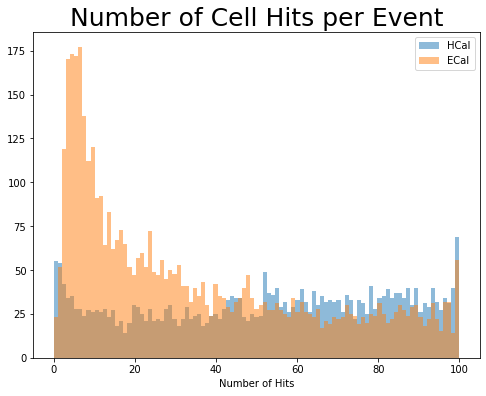

In [6]:
#fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=False,sharey=False)
fig = plt.figure(figsize=(8,6))
plt.title("Number of Cell Hits per Event",fontsize=25)
count_binning = np.linspace(0,100,100)
plt.hist(np.count_nonzero(~np.isnan(hcal_E),axis=1),bins=count_binning,alpha=0.5,label='HCal')
plt.hist(np.count_nonzero(~np.isnan(ecal_E),axis=1),bins=count_binning,alpha=0.5,label='ECal')
plt.legend()
plt.xlabel("Number of Hits")

In [7]:
counts = np.count_nonzero(~np.isnan(hcal_E),axis=1)
print(counts)
mask = counts<2
print(np.where(mask==True))

[235 113 108 ... 180 129  28]
(array([ 111,  140,  150,  179,  545,  788,  792,  927, 1380, 1699, 1759,
       1945, 1950, 1959, 2018, 2050, 2166, 2393, 2459, 2491, 2841, 3235,
       3308, 3327, 3637, 3781, 4200, 4217, 4254, 4284, 4377, 4552, 4567,
       4899, 5222, 5262, 5772, 5895, 6052, 6524, 6604, 6718, 7486, 7749,
       7919, 7929, 8102, 8315, 8370, 8503, 8673, 9251, 9302, 9314, 9316]),)


## Hit postion distributions

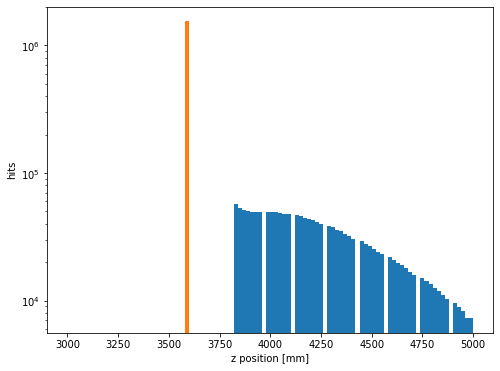

In [8]:
E_index = 0

fig = plt.figure( figsize=(8, 6))

#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60)
#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60)
plt.hist(hcal_Z.flatten(),bins=100, range=(3000,5000),label='HCAL')
plt.hist(ecal_Z.flatten(),bins=100, range=(3000,5000),label='ECAL')
#plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.position.z']),bins=100,range=(3000,5000), label='ECAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.show()

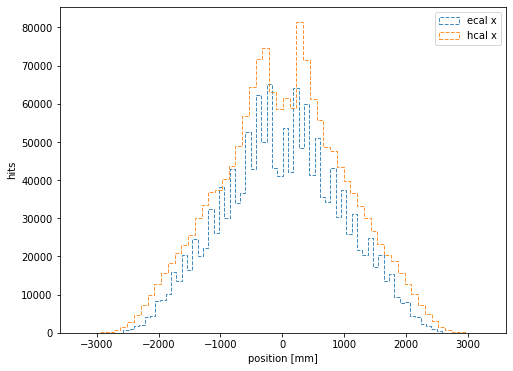

In [9]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ecal_X.flatten(),bins=60,label='ecal x',alpha=0.85,histtype='step',linestyle="--")
#plt.hist(ecal_Y.flatten(),bins=60, label='ecal y',alpha=0.85,histtype='step')
plt.hist(hcal_X.flatten(),bins=60,label='hcal x',alpha=0.85,histtype='step',linestyle="--")
#plt.hist(hcal_Y.flatten(),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

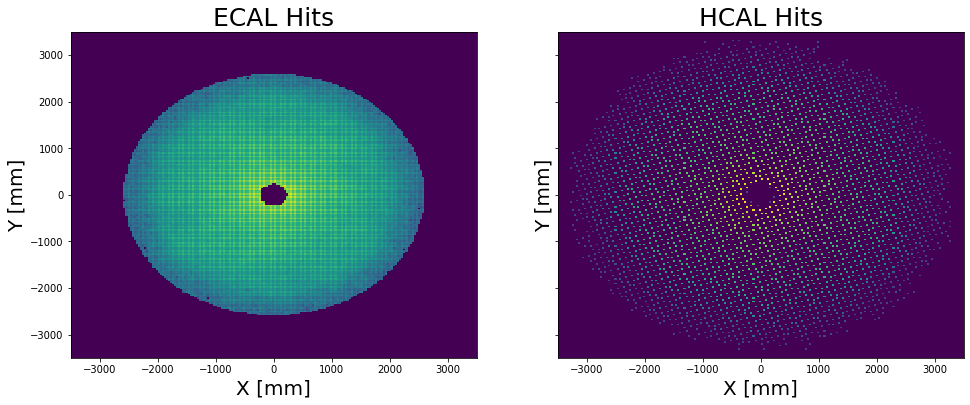

In [10]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ecal_X.flatten()
y = ecal_Y.flatten()
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))
plt.yticks(fontsize=20)
plt.xticks(fontsize=10)

x = hcal_X.flatten()
y = hcal_Y.flatten()
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))

ax[1].set_xlabel("X [mm]",fontsize=20)
ax[1].set_ylabel("Y [mm]",fontsize=20)
ax[1].set_title('HCAL Hits',fontsize=25)
ax[0].set_title('ECAL Hits',fontsize=25)
ax[0].set_xlabel("X [mm]",fontsize=20)
ax[0].set_ylabel("Y [mm]",fontsize=20)

#plt.show()
plt.savefig("cal_XY.pdf")

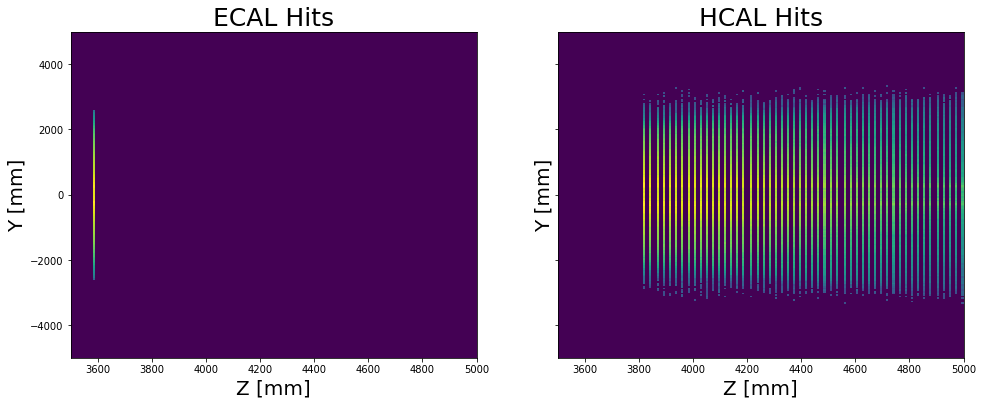

In [11]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
z = ecal_Z.flatten()
y = ecal_Y.flatten()
ax[0].hist2d(np.array(z),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

z = hcal_Z.flatten()
y = hcal_Y.flatten()
ax[1].hist2d(np.array(z),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('Z [mm]',fontsize=20)
ax[1].set_xlabel('Z [mm]',fontsize=20)
ax[0].set_ylabel('Y [mm]',fontsize=20)
ax[1].set_ylabel('Y [mm]',fontsize=20)

ax[1].set_title('HCAL Hits',fontsize=25)
ax[0].set_title('ECAL Hits',fontsize=25)

plt.savefig("cal_YZ.pdf")

## Hit energy distributions

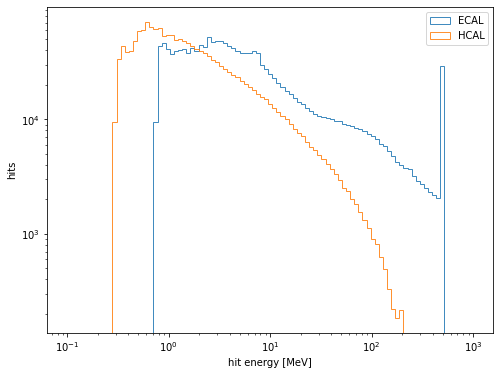

In [12]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ecal_E.flatten(),bins=np.geomspace(0.1,1000,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(hcal_E.flatten(),bins=np.geomspace(0.1,1000,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [13]:
print(np.mean(ecal_E.flatten()))

nan


In [14]:
HCALhits = hcal_E
print(np.shape(hcal_E))
HCAL_total = np.nansum(HCALhits,axis=-1)
HCAL_average = np.nanmean(HCALhits,axis=-1)
HCAL_nhits = np.zeros(np.shape(hcal_E)[0])
for i,event in enumerate(hcal_E):
    HCAL_nhits[i] = np.sum(~np.isnan(event))

print('total HCAL energy' , HCAL_total)
print('Average hit energy in HCAL' , HCAL_average)


ECALhits = ecal_E
ECAL_total = np.nansum(ECALhits,axis=-1)
ECAL_average = np.nanmean(ECALhits,axis=-1)
ECAL_nhits = np.zeros(np.shape(hcal_E)[0])
for i,event in enumerate(ecal_E):
    ECAL_nhits[i] = np.sum(~np.isnan(event))

print('total ECAL energy[MeV]' , ECAL_total)
print('Average hit energy in ECAL [MeV]' , ECAL_average)

(10000, 1736)
total HCAL energy [1113.9648   289.9353   356.34155 ...  518.68896  290.3015    87.25586]
Average hit energy in HCAL [4.740276  2.5657992 3.2994587 ... 2.8816054 2.2503994 3.1162808]
total ECAL energy[MeV] [ 288.63525 2319.1528   405.01404 ...  386.0016   715.2252  3194.4275 ]
Average hit energy in ECAL [MeV] [28.863525 20.166546 12.656689 ... 15.440063 28.609009 18.79075 ]


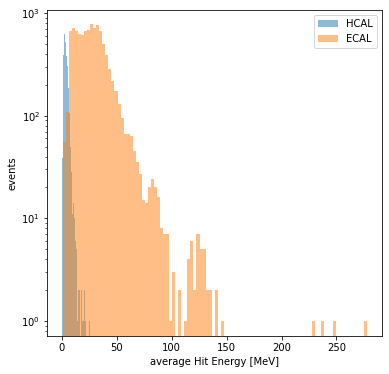

In [15]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_average,bins=100,alpha=0.5,label='HCAL')
plt.hist(ECAL_average,bins=100,alpha=0.5,label='ECAL')

plt.xlabel('average Hit Energy [MeV]')
plt.ylabel('events')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


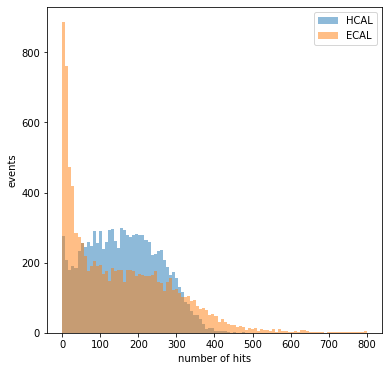

In [16]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,800),label='HCAL')
plt.hist(ECAL_nhits,bins=100,alpha=0.5,range=(0,800),label='ECAL')

plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [38]:
px = mc[:,3]
py = mc[:,4]
pz = mc[:,5]
mass = mc[:,6]
gen_theta = mc[:,9]

p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

In [76]:
hcal_E = hcal[:,0]
ecal_E = ecal[:,0]

[1113.9648   289.9353   356.34155 1146.0205   656.0791 ]
[ 288.63525 2319.1528   405.01404 1987.4878  2550.8271 ]
[1402.6001 2609.0881  761.3556 3133.5083 3206.9062]
[63.683533 18.953262 19.47083  59.409534 37.440903]


Text(0, 0.5, 'Reco Cluster Sum')

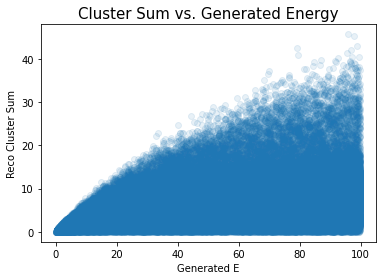

In [83]:
hcal_clusterSum = np.nansum(hcal_E,axis=-1)
ecal_clusterSum = np.nansum(ecal_E,axis=-1)
cluster_sum = hcal_clusterSum + ecal_clusterSum
print(hcal_clusterSum[:5])
print(ecal_clusterSum[:5])
print(cluster_sum[:5])
print(gen_E[:5,0])

plt.scatter(gen_E[:,0],cluster_sum/1000,alpha=0.1)
plt.title("Cluster Sum vs. Generated Energy",fontsize = 15)
plt.xlabel("Generated E")
plt.ylabel("Reco Cluster Sum")

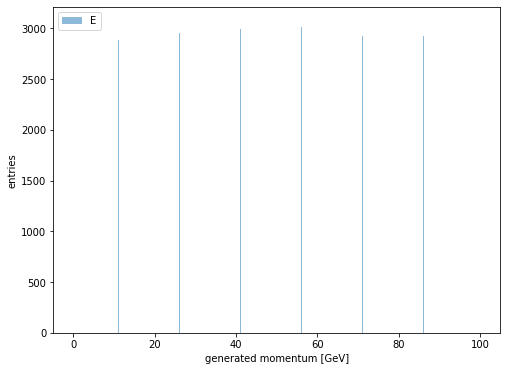

290500


In [19]:
fig = plt.figure( figsize=(8, 6))

#plt.hist(p,range=(0,100),bins=np.linspace(0,100,100),alpha=0.5,label="p")
plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5,label="E")
plt.legend()
plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


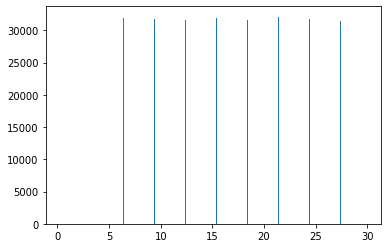

In [20]:
_ = plt.hist(gen_theta)